<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1



In [87]:
import torch
import tensorflow
import matplotlib.pyplot as plt
# In[2]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_u_mean = t_u.mean()
t_u_std = t_u.std()
t_un = (t_u - t_u_mean) / t_u_std


In [88]:
def linear_model(t_u, w, b):
    return w * t_u + b

In [89]:
def nonlinear_model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [90]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Adam and SGD optimizer

In [97]:
import torch.optim as optim
def train_model(n_epochs, learning_rate, params, model_func, optimizer_func, t_u, t_c):
    optimizer = optimizer_func(params, lr=learning_rate)
    loss_history = []
    for epoch in range(1, n_epochs + 1):
        t_p = model_func(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            loss_history.append(loss.item())
            print(f'Epoch {epoch}, Loss {loss.item()}')
    return params, loss_history

In [98]:
# Training Configurations
n_epochs = 5000
learning_rates = [0.1, 0.01, 0.001, 0.0001]
optimizers = [optim.SGD, optim.Adam]
loss_histories = {'SGD': [], 'Adam': []}

# Training Loop
for optimizer_func in optimizers:
    print(f"\nTraining with {optimizer_func.__name__} optimizer")
    for lr in learning_rates:
        print(f'\nTraining with learning rate: {lr}')
        trained_params, loss_history = train_model(
            n_epochs=n_epochs,
            learning_rate=lr,
            params=[torch.tensor([1.0], requires_grad=True), torch.tensor([1.0], requires_grad=True), torch.tensor([0.0], requires_grad=True)],
            model_func=nonlinear_model,
            optimizer_func=optimizer_func,
            t_u=t_un,
            t_c=t_c
        )
        loss_histories[optimizer_func.__name__].append(loss_history)


Training with SGD optimizer

Training with learning rate: 0.1
Epoch 500, Loss 2.090719699859619
Epoch 1000, Loss 2.090719699859619
Epoch 1500, Loss 2.090719699859619
Epoch 2000, Loss 2.090719699859619
Epoch 2500, Loss 2.090719699859619
Epoch 3000, Loss 2.090719699859619
Epoch 3500, Loss 2.090719699859619
Epoch 4000, Loss 2.090719699859619
Epoch 4500, Loss 2.090719699859619
Epoch 5000, Loss 2.090719699859619

Training with learning rate: 0.01
Epoch 500, Loss 2.092285633087158
Epoch 1000, Loss 2.0907201766967773
Epoch 1500, Loss 2.09071946144104
Epoch 2000, Loss 2.09071946144104
Epoch 2500, Loss 2.09071946144104
Epoch 3000, Loss 2.09071946144104
Epoch 3500, Loss 2.09071946144104
Epoch 4000, Loss 2.09071946144104
Epoch 4500, Loss 2.09071946144104
Epoch 5000, Loss 2.09071946144104

Training with learning rate: 0.001
Epoch 500, Loss 25.740373611450195
Epoch 1000, Loss 8.287433624267578
Epoch 1500, Loss 3.9922659397125244
Epoch 2000, Loss 2.7341158390045166
Epoch 2500, Loss 2.32018351554870

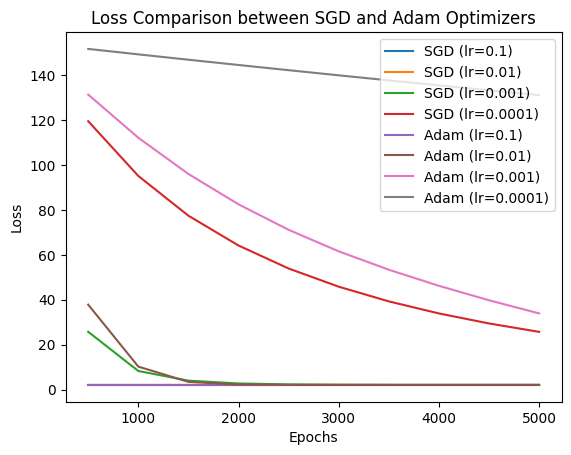

In [99]:
for optimizer_name, histories in loss_histories.items():
    for lr, history in zip(learning_rates, histories):
        if history:  # Check if history is not empty
            epochs = range(500, 500 * len(history) + 1, 500)
            plt.plot(epochs, history, label=f'{optimizer_name} (lr={lr})')
        else:
            print(f"No loss history for {optimizer_name} with learning rate {lr}")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison between SGD and Adam Optimizers')
plt.legend()
plt.show()

In [129]:
best_nonlinear_params = [torch.tensor([0.1], requires_grad=True), torch.tensor([0.01], requires_grad=True), torch.tensor([0.0], requires_grad=True)]

linear_params = train_model(
    n_epochs=n_epochs,
    learning_rate=0.1,
    params=[torch.tensor([1.0], requires_grad=True), torch.tensor([0.0], requires_grad=True)],
    model_func=linear_model,
    optimizer_func=optim.SGD,
    t_u=t_un,
    t_c=t_c
)

Epoch 500, Loss 2.927645206451416
Epoch 1000, Loss 2.927645206451416
Epoch 1500, Loss 2.927645206451416
Epoch 2000, Loss 2.927645206451416
Epoch 2500, Loss 2.927645206451416
Epoch 3000, Loss 2.927645206451416
Epoch 3500, Loss 2.927645206451416
Epoch 4000, Loss 2.927645206451416
Epoch 4500, Loss 2.927645206451416
Epoch 5000, Loss 2.927645206451416


In [130]:
# debug
w_tensor = linear_params[0][0]  # w is a tensor
b_tensor = linear_params[1][0] if isinstance(linear_params[1], list) else linear_params[1]

if isinstance(b_tensor, torch.Tensor):
    b_value = b_tensor
else:
    b_value = torch.tensor([b_tensor])
t_p_linear = linear_model(t_u, w_tensor, b_value).detach()



Non-linear Model Loss: 675.794189453125
Linear Model Loss: 230604.515625


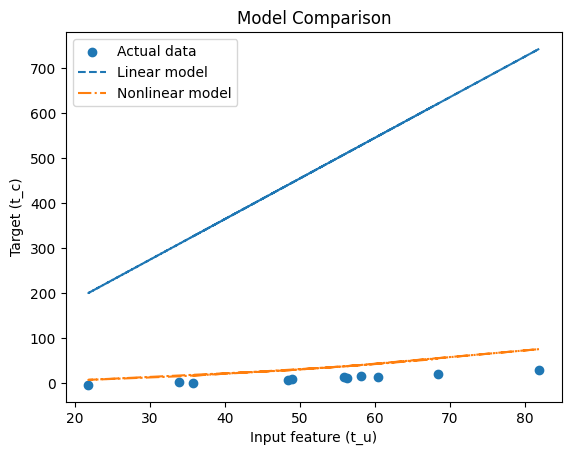

In [131]:
# Predictions
t_p_nonlinear = nonlinear_model(t_u, *best_nonlinear_params).detach()

# Loss Calculation
nonlinear_loss = loss_fn(t_p_nonlinear, t_c)
linear_loss = loss_fn(t_p_linear, t_c)

print(f'\nNon-linear Model Loss: {nonlinear_loss.item()}')
print(f'Linear Model Loss: {linear_loss.item()}')

# Plotting
plt.scatter(t_u.numpy(), t_c.numpy(), label='Actual data')
plt.plot(t_u.numpy(), t_p_linear.numpy(), label='Linear model', linestyle='--')
plt.plot(t_u.numpy(), t_p_nonlinear.numpy(), label='Nonlinear model', linestyle='-.')
plt.legend()
plt.xlabel('Input feature (t_u)')
plt.ylabel('Target (t_c)')
plt.title('Model Comparison')
plt.show()

# Problem 2